In [2]:
!pip install pandas numpy matplotlib seaborn plotly wordcloud

In [3]:
#Step 1 : Data Cleaning

import pandas as pd
import numpy as np

import os
print(os.getcwd())

# Load the data
df=pd.read_csv('./Datasets/startup_funding.csv')

# Quick overview
print(df.head())
print(df.info())

# Standardize startup names
df['Startup Name'] = df['Startup Name'].str.strip().str.title()

# Fix missing and inconsistent 'Amount Invested'
df['Amount in USD']=df['Amount in USD'].replace('Undisclosed',np.nan)
df['Amount in USD']=df['Amount in USD'].replace('unknown',np.nan)
df['Amount in USD']=df['Amount in USD'].replace('undisclosed',np.nan)
df['Amount in USD'] = df['Amount in USD'].replace({
	'\\\\xc2\\\\xa020,000,000': '2,00,00,000',
	'\\\\xc2\\\\xa0N/A': np.nan,
	'\\\\xc2\\\\xa0600,000': '6,00,000',
	'\\\\xc2\\\\xa0685,000': '6,85,000',
	'\\\\xc2\\\\xa019,350,000': '1,93,50,000',
	'\\\\xc2\\\\xa05,000,000': '50,00,000',
	'\\\\xc2\\\\xa010,000,000': '1,00,00,000',
    '\\\\xc2\\\\xa016,200,000':'16,200,000'
})
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# Parse and convert date
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce')
df['Year'] = df['Date dd/mm/yyyy'].dt.year
df['Month'] = df['Date dd/mm/yyyy'].dt.month

# Drop rows with no funding amount
df = df.dropna(subset=['Amount in USD'])

#Fxing Column names
import re

def clean_startup_name(name):
    if pd.isna(name):
        return name
    name = name.strip()  # Remove leading/trailing whitespace
    name = re.sub(r'https?://\S+', '', name)  # Remove URLs
    name = re.sub(r'[^A-Za-z0-9\s]', '', name)  # Remove special characters
    name = re.sub(r'\s+', ' ', name)  # Replace multiple spaces with single space
    return name.title()  # Convert to title case

df['Startup Name'] = df['Startup Name'].apply(clean_startup_name)


df['Startup Name']=df['Startup Name'].replace('Httpswwwwealthbucketin','Wealthbucket')



c:\Users\GC\Desktop\Data Science Become Data Scientist full\Data Analysis self projects\Indian Startups Funding Analysis
   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnTyp

In [4]:
df['Startup Name'].head()

0           Byjus
1          Shuttl
2       Mamaearth
3    Wealthbucket
4          Fashor
Name: Startup Name, dtype: object

In [5]:
df.isnull().sum().sort_values(ascending=False)

Remarks              1731
Date dd/mm/yyyy      1181
Year                 1181
Month                1181
SubVertical           654
City  Location        135
Industry Vertical     131
Investors Name         20
InvestmentnType         3
Sr No                   0
Startup Name            0
Amount in USD           0
dtype: int64

In [6]:

# Drop irrelevant column
df.drop(columns=["Remarks"], inplace=True)

# Parse and clean date
df['Date'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce')
df = df.dropna(subset=['Date'])  # Remove rows with invalid/missing date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.drop(columns=["Date dd/mm/yyyy"], inplace=True)

# Clean null values
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['City  Location'] = df['City  Location'].fillna('Unknown')
df['Industry Vertical'] = df['Industry Vertical'].fillna('Not Specified')
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')
df['InvestmentnType'] = df['InvestmentnType'].fillna('Not Specified')

# Standardize startup names
df['Startup Name'] = df['Startup Name'].str.title().str.strip()
df['Startup Name'] = df['Startup Name'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)
df['Startup Name'] = df['Startup Name'].str.replace(r'[^\w\s]', '', regex=True)

# Full fix in one go
df['Amount in USD'] = (
    df['Amount in USD']
    .astype(str)
    .str.replace(',', '', regex=False)
    .replace({'Undisclosed': None, 'N/A': None})
)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# Final check
print(df.isnull().sum().sort_values(ascending=False))


Sr No                0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
Year                 0
Month                0
Date                 0
dtype: int64


In [7]:
df['Date'].isnull().sum()


np.int64(0)

In [8]:
#Step 2: Exploratory Data Analysis (EDA)

# 1.Basic structure and overview 

print(df.info())
print(df.describe())
print(df['Year'].value_counts().sort_index())


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 3008
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              891 non-null    int64         
 1   Startup Name       891 non-null    object        
 2   Industry Vertical  891 non-null    object        
 3   SubVertical        891 non-null    object        
 4   City  Location     891 non-null    object        
 5   Investors Name     891 non-null    object        
 6   InvestmentnType    891 non-null    object        
 7   Amount in USD      891 non-null    float64       
 8   Year               891 non-null    int32         
 9   Month              891 non-null    int32         
 10  Date               891 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 76.6+ KB
None
             Sr No  Amount in USD         Year       Month  \
count   891.000000   8.91

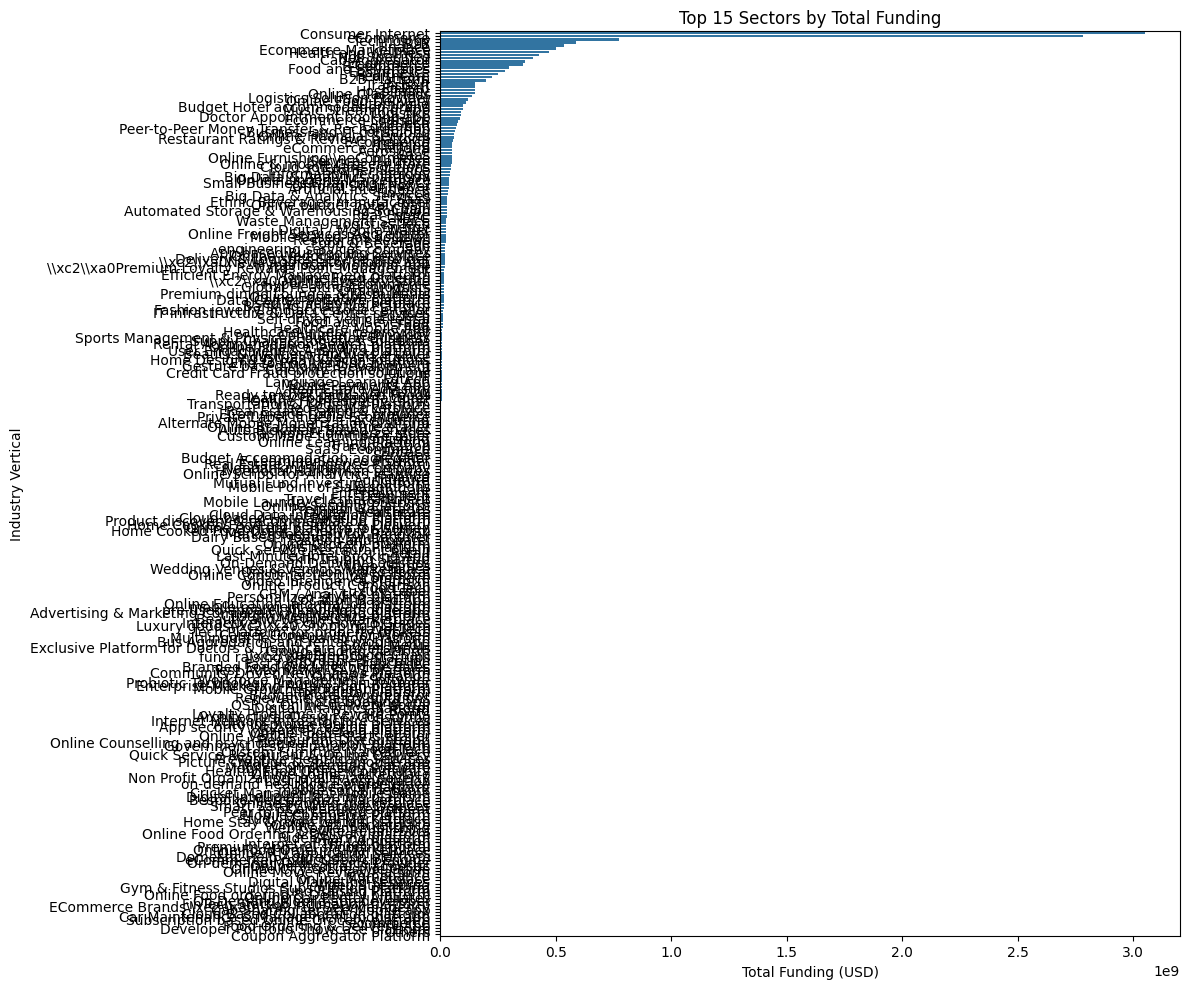

In [24]:
# 2. Total Funding by Sector

# Grouping total funding by Industry Vertical
sector_funding=df.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False)
sector_funding.head()


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 15 Sectors by Total Funding")
plt.xlabel("Total Funding (USD)")
plt.ylabel("Industry Vertical")
plt.tight_layout()
plt.savefig(f"{Python_Dashboards}/funding_trend_by_year.png", dpi=300)
plt.show()


# Directory to save images
Python_Dashboards = "eda_dashboards"
os.makedirs(Python_Dashboards, exist_ok=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 3008
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              891 non-null    int64         
 1   Startup Name       891 non-null    object        
 2   Industry Vertical  891 non-null    object        
 3   SubVertical        891 non-null    object        
 4   City  Location     891 non-null    object        
 5   Investors Name     891 non-null    object        
 6   InvestmentnType    891 non-null    object        
 7   Amount in USD      891 non-null    float64       
 8   Year               891 non-null    int32         
 9   Month              891 non-null    int32         
 10  Date               891 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 76.6+ KB


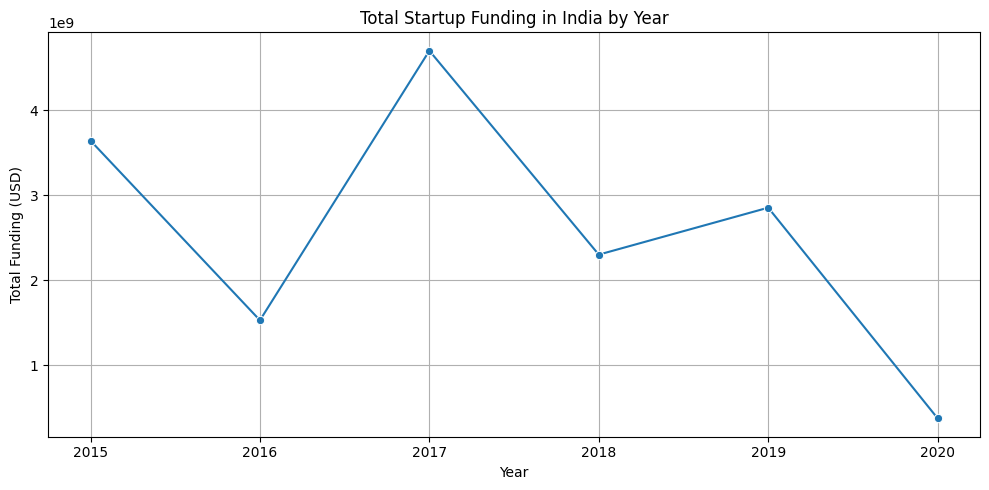

In [25]:
# 3. Funding Trends Over the Years

# Yearly funding trend
yearly_funding = df.groupby('Year')['Amount in USD'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_funding.index, y=yearly_funding.values, marker='o')
plt.title("Total Startup Funding in India by Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{Python_Dashboards}/funding_trend_by_year.png", dpi=300)
plt.show()


C:\Users\GC\AppData\Local\Temp\ipykernel_548\3841958505.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.values, y=top_investors.index, palette='coolwarm')


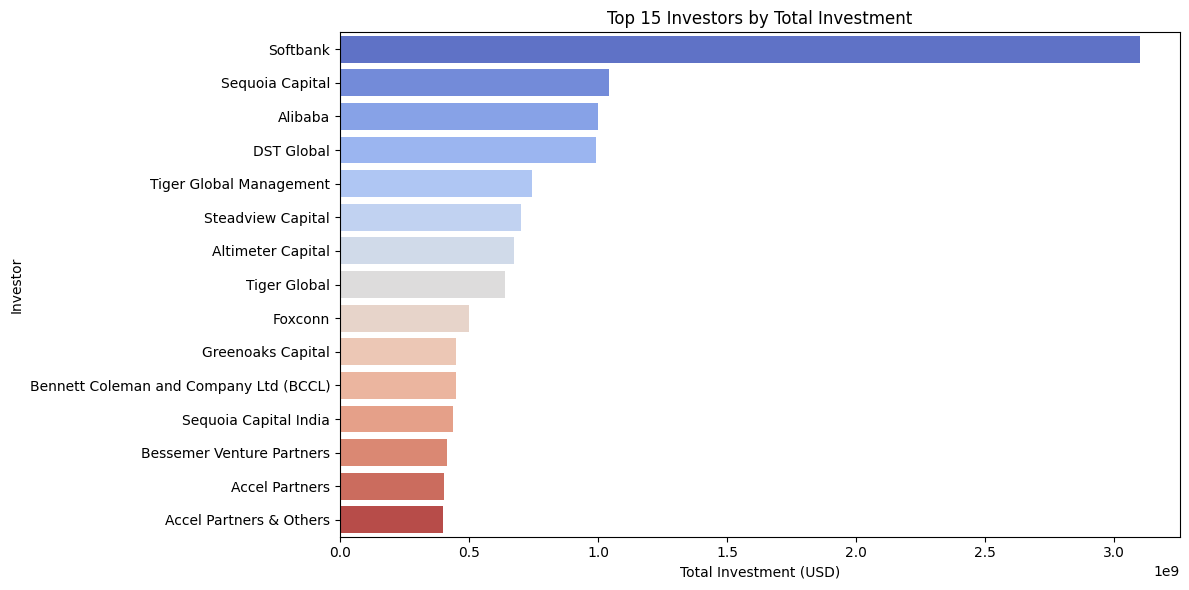

In [22]:
#4. Top Investors

# Clean investor column (split on commas and explode)
investors_split = df[['Investors Name', 'Amount in USD']].copy()
investors_split['Investors Name'] = investors_split['Investors Name'].str.split(',')
investors_split = investors_split.explode('Investors Name')
investors_split['Investors Name'] = investors_split['Investors Name'].str.strip()

# Group and sum
top_investors = investors_split.groupby('Investors Name')['Amount in USD'].sum().sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_investors.values, y=top_investors.index, palette='coolwarm')
plt.title("Top 15 Investors by Total Investment")
plt.xlabel("Total Investment (USD)")
plt.ylabel("Investor")
plt.tight_layout()
plt.savefig(f"{Python_Dashboards}/top_15_investors.png", dpi=300)
plt.show()

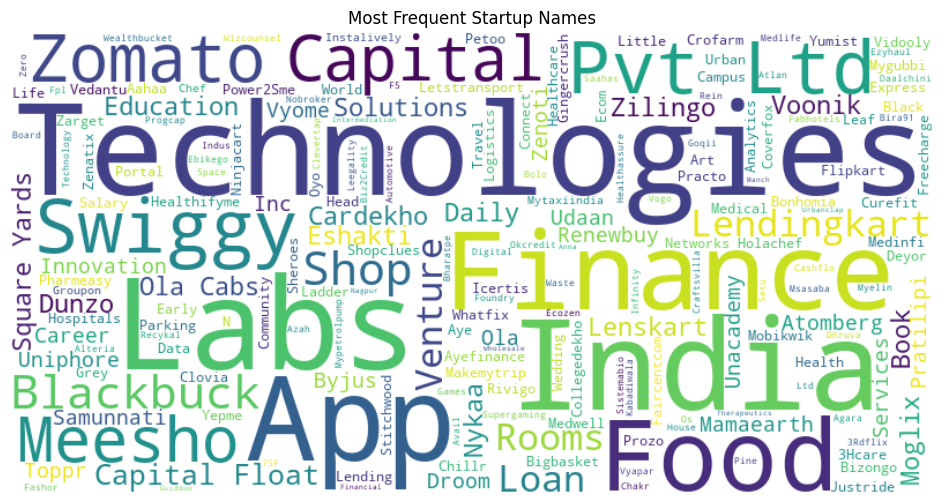

In [23]:
from wordcloud import WordCloud

text = " ".join(df['Startup Name'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Startup Names")
plt.savefig(f"{Python_Dashboards}/startup_names_wordcloud.png", dpi=300)
plt.show()
